# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob

import pyopia.classify
import pyopia.process
import pyopia.statistics
import pyopia.io

# List raw data files

In [2]:
raw_data = "raw_data"
raw_files = glob(os.path.join(raw_data, '*.silc'))
raw_files

['raw_data\\D20181101T142731.838206.silc',
 'raw_data\\D20181101T142732.772669.silc',
 'raw_data\\D20181101T142733.765097.silc',
 'raw_data\\D20181101T142734.292793.silc']

# Define custom functions or non-defult settings

In [3]:
from functools import partial

extractparticles_function = partial(pyopia.process.extract_particles,
                                    export_outputpath='test_export',
                                    min_length=0)

statextract_function = partial(pyopia.process.statextract,
                           minimum_area=12, threshold=0.98, real_time_stats=False,
                           max_coverage=30, max_particles=5000,
                           extractparticles_function=extractparticles_function)

# Initialise the CNN

In [4]:
# initialise the Classify class
cl = pyopia.classify.Classify()

# at this point you could overwrite custom classification functions,
# like cl.proc_predict() to work with a different classification network

# load the model (this example can be found here:
#    https://github.com/SINTEF/PySilCam/wiki/ml_models/keras_model.zip)
cl.load_model(model_path="C:\model\keras_model.h5")

# Calculate particle statistics for each image

In [8]:
for filename in raw_files:
    
    # load a silcam image
    img = np.load(filename, allow_pickle=False)
    
    # get the timestamp of the image (in this case from the filename)
    timestamp = pd.to_datetime(os.path.splitext(os.path.basename(filename))[0][1:])

    # setup the 'data' tuple with an image number, timestamp and the image
    data = (1, timestamp, img)

    # call process_image
    stats = pyopia.process.process_image(cl, data, statextract_function=statextract_function)
    
    pyopia.io.write_stats('proc/test.h5', stats)
    break

Processing time stamp 2018-11-01 14:27:31.838206
segment
clean
2.2% saturation
measure
  121 particles found


c:\users\emlynd\documents\github\pyopia\pyopia\process.py:230: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  meta.attrs['Modified'] = str(pd.datetime.now())


EXTRACTING 121 IMAGES from 121
  Image 1 processed in 1.89 sec (0.5 Hz). 


C:\Users\emlynd\.conda\envs\pyopia\lib\site-packages\tables\attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'export name_kind'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\emlynd\.conda\envs\pyopia\lib\site-packages\tables\attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'export name_meta'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\emlynd\.conda\envs\pyopia\lib\site-packages\tables\attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'export name_dtype'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural nami

## The STATS DataFrame

In [6]:
# print the stats DataFrame
stats

,major_axis_length,minor_axis_length,equivalent_diameter,solidity,minr,minc,maxr,maxc,probability_oil,probability_other,probability_bubble,probability_faecal_pellets,probability_copepod,probability_diatom_chain,probability_oily_gas,export name,timestamp,saturation
0,24.124216,18.275080,19.963065,0.780549,3.0,2263.0,24.0,2288.0,0.193203,0.039244,0.746780,0.000571,0.000669,0.001253,0.018281,D20181101T142731.838206-PN0,2018-11-01 14:27:31.838206,2.209868
1,30.764984,18.696429,22.482796,0.767892,5.0,2086.0,29.0,2116.0,0.191639,0.029599,0.721615,0.001161,0.000250,0.000212,0.055524,D20181101T142731.838206-PN1,2018-11-01 14:27:31.838206,2.209868
2,17.180819,14.007297,14.625466,0.753363,11.0,464.0,31.0,481.0,0.168439,0.029969,0.570907,0.002164,0.002839,0.000426,0.225255,D20181101T142731.838206-PN2,2018-11-01 14:27:31.838206,2.209868
3,33.121971,10.344231,15.430353,0.554896,19.0,2066.0,42.0,2098.0,0.357520,0.083664,0.510231,0.002287,0.000728,0.000492,0.045078,D20181101T142731.838206-PN3,2018-11-01 14:27:31.838206,2.209868
4,5.138213,3.243740,4.068429,0.866667,26.0,298.0,30.0,303.0,0.301012,0.061974,0.540936,0.005175,0.003111,0.008986,0.078807,D20181101T142731.838206-PN4,2018-11-01 14:27:31.838206,2.209868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,12.991804,9.071964,10.092530,0.747664,1964.0,114.0,1978.0,125.0,0.101065,0.006393,0.797901,0.000223,0.000282,0.000170,0.093966,D20181101T142731.838206-PN116,2018-11-01 14:27:31.838206,2.209868
117,9.664128,6.322519,7.312733,0.840000,2013.0,22.0,2023.0,31.0,0.123108,0.418551,0.447635,0.000736,0.000552,0.001143,0.008275,D20181101T142731.838206-PN117,2018-11-01 14:27:31.838206,2.209868
118,4.943708,3.632135,4.222008,0.933333,2015.0,1880.0,2019.0,1885.0,0.247294,0.083300,0.556920,0.008214,0.005401,0.011571,0.087302,D20181101T142731.838206-PN118,2018-11-01 14:27:31.838206,2.209868
119,25.195118,16.598958,19.015784,0.724490,2019.0,1879.0,2044.0,1903.0,0.265614,0.007997,0.291030,0.000372,0.000846,0.000449,0.433692,D20181101T142731.838206-PN119,2018-11-01 14:27:31.838206,2.209868


# Analysis, statistics and plotting

Text(0, 0.5, 'Volume Distribution [uL/sample vol.]')

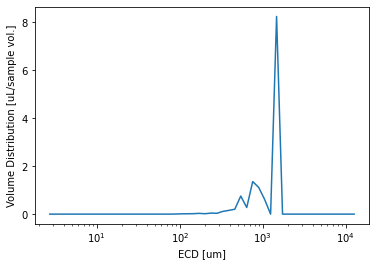

In [7]:
# there are lots of functions in pyopia.statistics. Here is just an example.

# Calculate the volume distribution from the stats DataFrame.
# (Usually several images would be needed for statistics to converge.
# This can be done by appending new image stats to the DataFrame)
dias, vd = pyopia.statistics.vd_from_stats(stats, 24)

# plot the volume distribution
plt.plot(dias, vd)
plt.xscale('log')
plt.xlabel('ECD [um]')
plt.ylabel('Volume Distribution [uL/sample vol.]')